# Scikit Learn ile Logistic Regression

Bu eğitimde aşağıdaki konular ele alınmaktadır:

- Kaggle'dan gerçek dünya veri setini indirme.
- Keşifsel veri analizi (exploratory data analysis) ve görselleştirme.
- Bir veri kümesini eğitim (training), doğrulama (validation) ve test kümelerine (test sets) bölme.
- Sayısal sütunlarda eksik değerleri doldurma/verme (filling/imputing).
- Sayısal özellikleri $(0,1)$ aralığına ölçeklendirme.
- Kategorik sütunları one-hot vektörler olarak kodlama (encoding).
- Scikit-learn kullanarak bir logistic regresyon modeli eğitmek (training).
- Doğrulama seti ve test seti kullanarak bir modelin değerlendirilmesi.
- Bir modeli diske kaydetme ve geri yükleme.

## Problem Tanımı

Bu eğitim, pratik ve kodlama odaklı bir yaklaşım benimser. [Kaggle'dan](https://kaggle.com/datasets): gerçek dünya veri kümesine _logistic regression_ uygulamayı öğreneceğiz


> **SORU**: [Avustralya veri setinde yağmur](https://kaggle.com/jsphyg/weather-dataset-rattle-package) çok sayıda Avustralya hava istasyonundan alınan yaklaşık 10 yıllık günlük hava durumu gözlemlerini içerir. İşte veri kümesinden küçük bir örnek:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> Meteoroloji Bürosu'nda bir veri bilimcisi olarak, yarın belirli bir konumda yağmur yağıp yağmayacağını tahmin etmek için bugünün hava verilerini kullanabilen tam otomatik bir sistem oluşturmakla görevlendirildiniz.
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


**ALIŞTIRMA**: Daha fazla ilerlemeden önce, bu probleme nasıl yaklaşabileceğinizi düşünmek için bir dakikanızı ayırın. Aklınıza gelen beş veya daha fazla fikri aşağıda listeleyin:

1. ???
2. ???
3. ???
4. ???
5. ???

## Linear Regression vs. Logistic Regression


Önceki eğitimde, _linear regression_ kullanarak bir kişinin yıllık medikal masraflarını tahmin etmeye çalıştık. Bu eğitimde, yarın yağmur yağıp yağmayacağını tahmin etmek gibi _classification (sınıflandırma)_ problemleri için daha uygun olan _logistic regression_ kullanacağız. Verilen bir problemin bir _classfication (sınıflandırma)_ mı yoksa bir _regression_ problemi mi olduğunu belirlemek, makine öğreniminde önemli bir ilk adımdır.

### Sınıflandırma (Classification) Problemleri

Her girdiye (input) ayrı (discrete) bir kategori [etiket (label) veya sınıf (class) da denir] atanması gereken problemler, _sınıflandırma (classification) problemleri_ olarak bilinir.

Aşağıda bazı sınıflandırma problemlerine örnekler verilmiştir:

- [Yağış Miktarı Tahmini](https://kaggle.com/jsphyg/weather-dataset-rattle-package): Bugünün hava durumu verilerini kullanarak yarın yağmur yağıp yağmayacağını tahmin etme. (Sınıflar "Yağmur Yağacak" ve "Yağmur Yağmayacak")
- [Meme Kanseri Tespiti](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Bir tümörün "iyi huylu" (kanserli olmayan) veya "kötü huylu" (kanserli) olup olmadığını yarıçap, doku vb. bilgileri kullanarak tahmin etme. yarıçap, doku vb.
- [Kredi Geri Ödeme Tahmini](https://www.kaggle.com/c/home-credit-default-risk): Başvuru sahiplerinin yaş, gelir, kredi tutarı, çocuk sayısı gibi faktörlere dayalı olarak konut kredisini geri ödeyip ödemeyeceğini tahmin etme.
- [El Yazısı Rakam Tanıma](https://www.kaggle.com/c/digit-recognizer): El yazısı metnin bir resminin 0 ile 9 arasındaki hangi basamağı temsil ettiğini belirleme.

Biraz daha sınıflandırma problemi düşünebilir misiniz?

> **ALIŞTIRMA**: Bu eğitimde izlenen adımları yukarıdaki veri kümelerinin her biri ile çoğaltın.

Sınıflandırma problemleri ikili (evet/hayır) veya çok sınıflı (birçok sınıftan birini seçerek) olabilir.

### Regression Problemleri

Her giriş (input) için sürekli bir sayısal değerin tahmin edilmesi gereken problemler, _regression problemleri_ olarak bilinir.

Aşağıda bazı regression problemlerine örnekler verilmiştir:

- [Tıbbi Masraf Tahmini](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
- [Ev Fiyat Tahmini](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) 
- [Okyanus Sıcaklığı Tahmini](https://www.kaggle.com/sohier/calcofi)
- [Hava Sıcaklığı Tahmini](https://www.kaggle.com/budincsevity/szeged-weather)

Biraz daha regression problemi düşünebilir misiniz?

> **ALIŞTIRMA**: Yukarıdaki veri kümelerinin her biri ile önceki eğitimde izlenen adımları çoğaltalım.

### Regression Problemlerini Çözmek İçin Doğrusal (Linear) Regression

Doğrusal regresyon (linear regression), regression problemlerini çözmek için yaygın olarak kullanılan bir tekniktir. Doğrusal bir regresyon modelinde hedef, girdi özelliklerinin doğrusal bir kombinasyonu (veya ağırlıklı toplamı) olarak modellenir. Modelden gelen tahminler, Kök Ortalama Kare Hatası (RMSE) gibi bir kayıp fonksiyonu kullanılarak değerlendirilir.

İşte bir doğrusal regresyon modelinin nasıl yapılandırıldığının görsel bir özeti:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


Doğrusal regresyonun (linear regression) matematiksel bir tartışması için [bu YouTube oynatma listesini](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1) izleyin.

### Sınıflandırma (Classification) Problemlerini Çözmek İçin Logistic Regression

Logistic regression, ikili sınıflandırma problemlerini çözmek için yaygın olarak kullanılan bir tekniktir. Logistic regresyon modelinde:


- Doğrusal (linear) kombinasyonu (veya input özelliklerinin ağırlıklı toplamını) alıyoruz.
- 0 ile 1 arasında bir sayı elde etmek için sonuca sigmoid fonksiyonunu uygularız.
- Bu sayı, input'un "Evet" olarak sınıflandırılma olasılığını temsil eder.
- Sonuçları değerlendirmek için RMSE yerine cross entropy kaybı fonksiyonu kullanılır.


İşte bir logistic regression modelinin nasıl yapılandırıldığının görsel bir özeti ([kaynak](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

Girdilerin (inputların) doğrusal (lineer) kombinasyonuna uygulanan sigmoid fonksiyonu aşağıdaki formüle sahiptir:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

Sigmoid fonksiyonunun çıktısına (output'una) logistic denir, bu nedenle _logistic regression_ adı verilir. Logistic regression, sigmoid aktivasyonu ve cross entropy'nin matematiksel bir tartışması için [bu YouTube oynatma listesine](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1) göz atın. Logistic regression, birkaç değişiklikle çok sınıflı sınıflandırma problemlerine de uygulanabilir.

### Makine Öğrenimi İş Akışı

İster doğrusal (lineer) regresyon kullanarak bir regresyon problemini, isterse logistic regresyon kullanarak bir sınıflandırma problemini çözelim, bir modeli eğitmek için iş akışı tamamen aynıdır:

1. Rastgele parametrelerle (ağırlıklar ve biases) bir model başlatıyoruz.
2. Tahminleri elde etmek için bazı girdileri (input'ları) modele aktarıyoruz.
3. Kayıp fonksiyonunu kullanarak modelin tahminlerini gerçek hedeflerle karşılaştırırız.
4. Modelin ağırlıklarını ve bias'larını ayarlayarak kaybı azaltmak için bir optimizasyon tekniği [en küçük kareler (least squares), gradyan inişi (gradient descent) vb.] kullanıyoruz.
5. Modelden gelen tahminler yeterince iyi olana kadar 1'den 4'e kadar olan adımları tekrarlıyoruz.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Sınıflandırma ve regresyon, etiketli (labeled) verileri kullandıkları için denetimli (supervised) makine öğrenimi problemleridir. Etiketlenmemiş (unlabeled) verilere uygulanan makine öğrenimi, denetimsiz (unsupervised) öğrenme olarak bilinir. ([görüntü kaynağı](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">

Bu eğitimde, bugünün verilerini kullanarak yarın bir yerde yağmur yağıp yağmayacağını tahmin etmek için Avustralya'da Yağış Miktarı veri setini kullanarak bir _logistic regression_ modeli eğiteceğiz. Bu bir _ikili sınıflandırma_ problemidir.

Modelimizi eğitmek için kullanacağımız `scikit-learn` kütüphanesini kuralım.

In [ ]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Verileri İndirme

Verileri doğrudan Kaggle'dan Google Colab'ın içine indirmek için [`opendatasets`](https://github.com/JovianML/opendatasets) kütüphanesini kullanacağız. `opendatasets`'i kurup import edelim.

In [ ]:
!pip install opendatasets --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

Veri seti artık `od.download` kullanılarak indirilebilir. `od.download` işlemini yürüttüğünüzde, Kaggle kullanıcı adınızı ve API anahtarınızı sağlamanız istenecektir. API anahtarı oluşturmak için şu talimatları izleyelim: http://bit.ly/kaggle-creds

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: erkamm
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 182MB/s]

Yukarıdaki komut yürütüldüğünde, veri kümesi indirilir ve `weather-dataset-rattle-package` dizinine çıkarılır.

In [ ]:
import os

In [ ]:
data_dir = './weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + '/weatherAUS.csv'

Pandas kullanarak `weatherAUS.csv`deki verileri yükleyelim.

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Veri kümesi 145.000'den fazla satır ve 23 sütun içerir. Veri kümesi tarih, sayısal ve kategorik sütunlar içerir. Amacımız, `RainTomorrow` sütunundaki değeri tahmin etmek için bir model oluşturmaktır.

Çeşitli sütunlardaki veri türlerini ve eksik değerleri kontrol edelim.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Çoğu sütun için eksik değerleri doldurabilmemiz gerekirken, analizimizi ve modellememizi daha basit hale getirmek için `RainTomorrow` veya `RainToday` değerinin eksik olduğu satırları atmak iyi bir fikir olabilir (çünkü bunlardan biri hedef değişken ve diğerinin hedef değişkenle çok yakından ilişkili olması muhtemeldir).

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Diğer sütunlardaki eksik değerlerle nasıl başa çıkarsınız?

## Keşifsel Veri Analizi (Exploratory Data Analysis) ve Görselleştirme

Bir makine öğrenimi modelini eğitmeden önce, çeşitli sütunların dağılımlarını keşfetmek ve bunların hedef sütunla nasıl ilişkili olduğunu görmek her zaman iyi bir fikirdir. Plotly, Matplotlib ve Seaborn kütüphanelerini kullanarak verileri keşfedip görselleştirelim. Bu kütüphanelerin nasıl kullanılacağını öğrenmek için bu eğitimleri izleyin:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df, x='Location', title='Konum vs. Yağmurlu Günler', color='RainToday')

In [ ]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title="15:00'da Sıcaklık vs. Yarın Yağmur", 
             color='RainTomorrow')

In [ ]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Yarın Yağmur vs. Bugün Yağmur')

In [ ]:
px.scatter(raw_df.sample(2000), 
           title='Minimum Sıcaklık vs Maksimum Sıcaklık',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [ ]:
px.scatter(raw_df.sample(2000), 
           title="15:00'da Sıcaklık vs. 15:00'da Nem",
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

Yukarıdaki çizelgelerden hangi yorumları çizebilirsiniz?

> **ALIŞTIRMA**: Veri kümesinin diğer tüm sütunlarını görselleştirin ve bunların `RainToday` ve `RainTomorrow` sütunlarıyla ilişkilerini inceleyin.

## (Opsiyonel) Bir Örnekle Çalışma

Milyonlarca satır içeren büyük veri setleriyle çalışırken, model eğitim (training) defterinizi hızlı bir şekilde ayarlamak için başlangıçta bir örnekle çalışmak iyi bir fikirdir. Bir örnekle çalışmak istiyorsanız, `ornek_kullan` değerini `True` olarak ayarlamanız yeterlidir.

In [ ]:
ornek_kullan = False

In [ ]:
ornek_fraksiyonu = 0.1

In [ ]:
if ornek_kullan:
  raw_df = raw_df.sample(frac=ornek_fraksiyonu).copy()

`ornek_kullan`'ı `False` olarak ayarladığınızdan emin olun ve tüm veri kümesini kullanmaya hazır olduğunuzda not defterini baştan sona yeniden çalıştırın.

## Training, Validation ve Test Seti

Gerçek dünya makine öğrenimi modelleri oluştururken, veri kümesini üç bölüme ayırmak oldukça yaygındır:

1. **Training seti** - modeli eğitmek (training), yani kaybı hesaplamak ve bir optimizasyon tekniği kullanarak modelin ağırlıklarını ayarlamak için kullanılır.


2. **Validation seti** - training sırasında modeli değerlendirmek, model hiperparametrelerini ayarlamak (optimizasyon tekniği, düzenlileştirme vb.) ve modelin en iyi versiyonunu seçmek için kullanılır. İyi bir genelleme yapan training modelleri için iyi bir doğrulama (validation) seti seçmek çok önemlidir. [Daha fazlasını buradan öğrenin.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test seti** - farklı modelleri veya yaklaşımları karşılaştırmak ve modelin nihai doğruluğunu raporlamak için kullanılır. Birçok veri seti için test setleri ayrı olarak sağlanır. Test seti, modelin gerçek dünyada karşılaşacağı veri türünü mümkün olduğunca yakından yansıtmalıdır.

<img src="https://i.imgur.com/j8eITrK.png" width="480">

Genel bir kural olarak, training seti için verilerin yaklaşık %60'ını, doğrulama (validation) seti için %20'sini ve test seti için %20'sini kullanabilirsiniz. Zaten ayrı bir test seti sağlanmışsa, %75 - %25 training-validation ayrımı kullanabilirsiniz.


Veri kümesindeki satırların doğal bir sırası olmadığında, test ve doğrulama (validation) kümeleri oluşturmak için rastgele satır alt kümeleri seçmek yaygın bir uygulamadır. Bu, `scikit-learn`den `train_test_split` yardımcı programı kullanılarak yapılabilir. Daha fazlasını buradan öğrenin: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_degeri_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

In [ ]:
train_df, deger_df = train_test_split(train_degeri_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('deger_df.shape :', deger_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
deger_df.shape : (28158, 23)
test_df.shape : (28158, 23)


Bununla birlikte, tarihlerle çalışırken, modelin geçmişten gelen veriler üzerinde eğitilmesi ve gelecekten gelen veriler üzerinde değerlendirilmesi için training, validation ve test setlerini zamanla (time) ayırmak genellikle daha iyi bir fikirdir.

Mevcut veri kümesinde, yıl için başka bir sütun oluşturmak için veri kümesindeki `Date` sütununu kullanabiliriz. Test seti için son iki yılı ve doğrulama (validation) seti için ondan önceki yılı seçeceğiz.

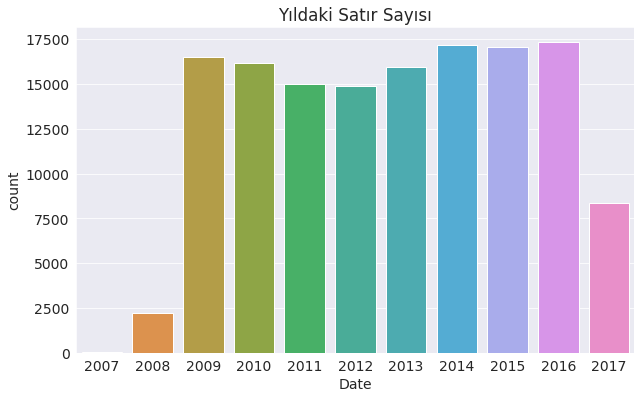

In [ ]:
plt.title('Yıldaki Satır Sayısı')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
yil = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[yil < 2015]
val_df = raw_df[yil == 2015]
test_df = raw_df[yil > 2015]

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


Mükemmel bir 60-20-20 ayrımı olmasa da, test doğrulama ve test setlerinin her ikisinin de yılın 12 ayı için veri içermesini sağladık.

In [ ]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [ ]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [ ]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


## Girdi (Input) ve Hedef (Target) Sütunları Tanımlama

Çoğu zaman, bir veri kümesindeki tüm sütunlar bir modeli eğitmek için yararlı değildir. Mevcut veri setinde, `Date` sütununu görmezden gelebiliriz, çünkü sadece ertesi gün yağmur yağıp yağmayacağına dair hava koşulları hakkında bir tahminde bulunmak istiyoruz.

Giriş sütunlarının bir listesini oluşturalım ve ayrıca hedef sütunu tanımlayalım.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
target_col

'RainTomorrow'

Artık daha fazla işleme (processing) ve model eğitimi (training) için training, validation ve test setleri için girdiler ve hedefler oluşturabiliriz.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [ ]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Ayrıca sütunlardan hangilerinin sayısal, hangilerinin kategorik olduğunu belirleyelim. Logistic regresyon modelini eğitmek için kategorik verileri sayılara dönüştürmemiz gerekeceğinden, bu daha sonra faydalı olacaktır.

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Sayısal sütunlar için bazı istatistikleri görelim.

In [ ]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000


Sayısal sütunların aralıkları makul görünüyor mu? Makul görünmüyorsa, bazı veri temizliği (data cleaning) de yapmamız gerekebilir.

Kategorik sütunların her birindeki kategori sayısını da kontrol edelim.

In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Eksik Sayısal Verileri Atama (Imputing)

Makine öğrenimi modelleri, eksik sayısal verilerle çalışamaz. Eksik değerleri doldurma işlemine **imputation** denir.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

Atama (imputation) için birkaç teknik vardır, ancak en temel olanı kullanacağız: `sklearn.impute`'dan `SimpleImputer` class'ını kullanarak sütundaki eksik değerleri ortalama değerle değiştirmek.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

Atama (imputation) gerçekleştirmeden önce, her bir sayısal sütundaki eksik değerlerin sayısını kontrol edelim.

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

Bu değerler training, validation ve test setlerine yayılmıştır. Ayrıca `train_inputs`, `val_inputs` ve `test_inputs` için eksik değerlerin sayısını ayrı ayrı kontrol edebiliriz.

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
dtype: int64

Imputation'daki ilk adım, imputer'ı verilere `fit` etmek, yani veri kümesindeki her sütun için seçilen istatistiği (örneğin ortalama yani mean) hesaplamaktır.

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()